In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
dir_datasets = '/content/drive/MyDrive/DataScience/Data Science Course/0.Datasets/{}'

df_movies = pd.read_csv(dir_datasets.format('IMDb movies.csv'), low_memory=False)
df_ratings = pd.read_csv(dir_datasets.format('IMDb ratings.csv'), low_memory=False)

In [5]:
df_movies = df_movies[['imdb_title_id', 'title', 'year', 'genre', 'country']]
df_ratings = df_ratings[['imdb_title_id', 'total_votes', 'mean_vote']]

In [6]:
df_movies.head()

,imdb_title_id,title,year,genre,country
0,tt0000009,Miss Jerry,1894,Romance,USA
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia
2,tt0001892,Den sorte drøm,1911,Drama,"Germany, Denmark"
3,tt0002101,Cleopatra,1912,"Drama, History",USA
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy


In [7]:
df_ratings.head()

,imdb_title_id,total_votes,mean_vote
0,tt0000009,154,5.9
1,tt0000574,589,6.3
2,tt0001892,188,6.0
3,tt0002101,446,5.3
4,tt0002130,2237,6.9


# **LEFT JOIN AND LEFT JOIN EXCLUSIVE**

### **LEFT JOIN**

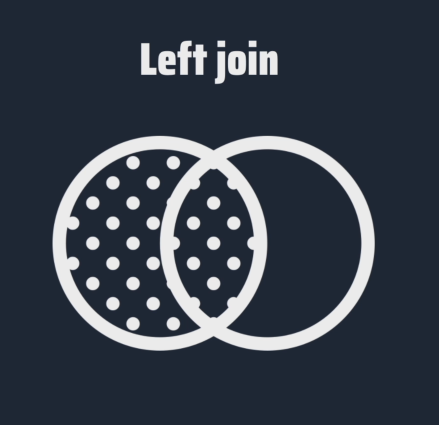

In [8]:
df_left_join = df_movies.merge(df_ratings, on='imdb_title_id', how='left')
df_left_join

,imdb_title_id,title,year,genre,country,total_votes,mean_vote
0,tt0000009,Miss Jerry,1894,Romance,USA,154,5.9
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,589,6.3
2,tt0001892,Den sorte drøm,1911,Drama,"Germany, Denmark",188,6.0
3,tt0002101,Cleopatra,1912,"Drama, History",USA,446,5.3
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,2237,6.9
...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,"France, Belgium",398,5.5
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",Netherlands,724,7.9
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,India,265,7.8
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",Turkey,194,9.4


# **EXERCISE #1**

In [12]:
# extract 50% samples of df_movies
df_movies_samples = df_movies.sample(frac=0.5)

In [13]:
# merge df_movies_samples and df_ratings (left join)
df_left_join_movies_sample = df_movies_samples.merge(df_ratings, on='imdb_title_id', how='left')

In [15]:
# shape
print(df_movies_samples.shape)
print(df_ratings.shape)
print(df_left_join_movies_sample.shape)

(42928, 5)
(85855, 3)
(42928, 7)


### **LEFT JOIN EXCLUSIVE**

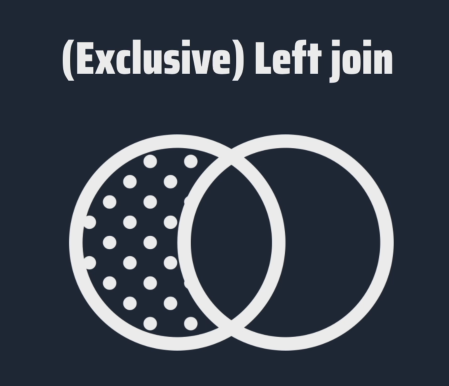

In [16]:
df_left_join_exclusive = df_movies.merge(df_ratings, 
                                         on='imdb_title_id', 
                                         how='outer', 
                                         indicator=True).query('_merge=="left_only"')
df_left_join_exclusive

,imdb_title_id,title,year,genre,country,total_votes,mean_vote,_merge


# **EXERCISE #2**

In [20]:
# make a copy of df_movies
df_movies_2 = df_movies.copy()

In [21]:
# select first 1000 values of column imdb_title_id 
for i in df_movies_2.index:
  if i < 1000:
    df_movies_2.loc[i, 'imdb_title_id'] = 'tt1234567890'

In [22]:
df_movies_2

,imdb_title_id,title,year,genre,country
0,tt1234567890,Miss Jerry,1894,Romance,USA
1,tt1234567890,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia
2,tt1234567890,Den sorte drøm,1911,Drama,"Germany, Denmark"
3,tt1234567890,Cleopatra,1912,"Drama, History",USA
4,tt1234567890,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy
...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,"France, Belgium"
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",Netherlands
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,India
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",Turkey


In [19]:
# merge df_movies_2 and df_ratings (exclusive left join)


In [24]:
df_movies_2_exlusive_left_join = df_movies_2.merge(df_ratings, 
                                                   on='imdb_title_id', 
                                                   how='outer', 
                                                   indicator=True).query('_merge=="left_only"')
df_movies_2_exlusive_left_join

,imdb_title_id,title,year,genre,country,total_votes,mean_vote,_merge
0,tt1234567890,Miss Jerry,1894,Romance,USA,NaN,NaN,left_only
1,tt1234567890,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia,NaN,NaN,left_only
2,tt1234567890,Den sorte drøm,1911,Drama,"Germany, Denmark",NaN,NaN,left_only
3,tt1234567890,Cleopatra,1912,"Drama, History",USA,NaN,NaN,left_only
4,tt1234567890,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
995,tt1234567890,Agente segreto Z1,1930,Drama,USA,NaN,NaN,left_only
996,tt1234567890,Tom Sawyer,1930,"Adventure, Comedy, Drama",USA,NaN,NaN,left_only
997,tt1234567890,Tonka Sibenice,1930,Drama,"Czechoslovakia, Germany",NaN,NaN,left_only
998,tt1234567890,Top Speed,1930,"Comedy, Musical, Romance",USA,NaN,NaN,left_only


In [25]:
# shape
print(df_movies_2.shape)
print(df_ratings.shape)
print(df_movies_2_exlusive_left_join.shape)

(85855, 5)
(85855, 3)
(1000, 8)
